In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Intermediate_data/Baseline_jadon_v0.csv',index_col=0)

In [22]:
df['Signal'].value_counts()

Signal
1    102
0     54
Name: count, dtype: int64

In [7]:
X_train = df.loc['2010-01-01':'2018-12-31',:].drop('Signal',axis=1)
y_train = df.loc['2010-01-01':'2018-12-31','Signal']
X_test = df.loc['2018-12-31':,:].drop('Signal',axis=1)
y_test = df.loc['2018-12-31':,'Signal']

In [38]:
model = xgb.XGBClassifier()

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}

grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=3)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [39]:
accuracy_score(best_model.predict(X_test), y_test)

0.7142857142857143

In [40]:
best_model.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

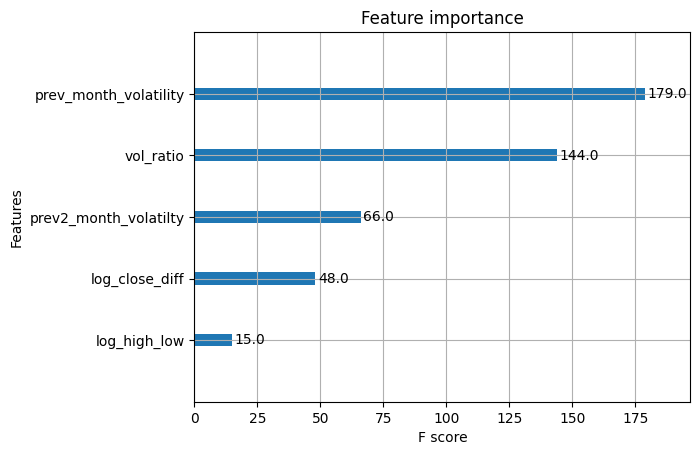

In [44]:
xgb.plot_importance(best_model)